In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mypath = 'Datos_14oct_2' #path with files to analyze
from matplotlib.ticker import AutoMinorLocator
files = [f for f in listdir(mypath) if isfile(join(mypath, f))] #get all file names of that path
from scipy.optimize import curve_fit

In [2]:
def get_Error(file_name):
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    df.sort_values(by=["fecha"])
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.groupby(["fecha"], as_index=False).mean()
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    #data analysis per se
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    error = df[19:,4]-df[19:,2]
    return error,df[19:,1]

In [3]:
#apparently theres like no function to make this thing i want
def make_hist(file_name,error,r_seven,bs,loc=2,save=False):
    error = error[:-10]
    r_seven = r_seven[:-10]
    error = abs(error)
    max_v = round(max(r_seven),1) 
    min_v = round(min(r_seven),1)
    print(file_name,max_v,min_v)
    r_bins = np.arange(min_v,max_v+bs,bs) #bin range
    rr_bins = np.arange(min_v,max_v+bs,bs*loc) #the loc factor comes into pay here
    n_size = r_bins.shape[0]-1 #amount of bins
    c_bins = np.zeros(n_size) #center of bins
    e_bins = np.zeros(n_size) #errors with same size
    i = 0 #this is just a counter
    #now we count for each bin based on error
    cuenta = 0
    while i < n_size:
        indices1 = (i*bs<=r_seven)
        indices2 = (r_seven < (i+1)*bs)
        indices = indices1*indices2
        errores = np.copy(error[indices])
        cuenta += errores.shape[0]
        e_bins[i] = np.mean(errores)
        c_bins[i] = (2*i+1)*(bs/2)
        i = i +1
    plt.figure()
    plt.title(str(file_name)+' - Error-R7 - bs = 0.2')
    ax = plt.axes()
    pos = np.arange(len(c_bins))
    ax.set_xticks(rr_bins)
    ax.set_xticklabels(())
    ax.set_xticklabels((rr_bins.round(2)))
    plt.xlabel(r'$R_7$',fontsize=12)
    plt.ylabel('Error',fontsize=12)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2)) #for minor ticks to be visible its the easiest i could find tbh
    plt.xticks(fontsize=12,rotation=90)
    plt.bar(c_bins, e_bins, bs, color='r',edgecolor='k')
    #plt.savefig(str(file_name)+'_hist_0p4_sinult10dias.pdf')
    plt.show()
    return c_bins,e_bins

# grafico aca el tema de los errores - func de R7 (log-log)

In [4]:
def exponential(x,a,b):
    return a*(x**b)

# avellaneda

RiesgoAvellanedaNA
RiesgoAvellanedaNA 2.8 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


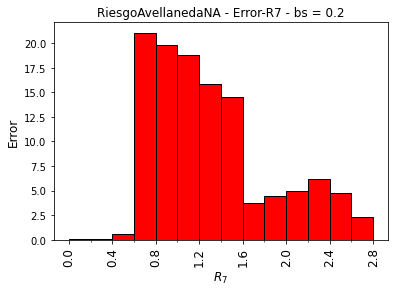

parametros:  [18.37987648 -0.46730747] [1.54691509 1.63452936]
parametros (log) (pend,ord):  [ 1.26434259 -0.46730747] [0.18946648 1.63452936]
[[0.1896757  0.00124548]
 [0.00124548 0.00751821]] 
 [[ 0.04495446 -0.03917883]
 [-0.03917883  0.03486844]]


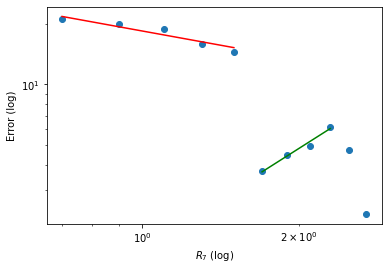

In [6]:
bs = 0.2
print(files[0])
error,r_seven = get_Error(files[0])
file_name = files[0]
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_Avellaneda.pdf')
plt.scatter(b_centers[3:],b_errors[3:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('Avellaneda_2.pdf')
pars1, cov1 = curve_fit(f=exponential,xdata=b_centers[3:8],ydata=b_errors[3:8], p0=[0, 0], bounds=(-np.inf, np.inf))
x_lin1 = np.linspace(min(b_centers[3:8]),max(b_centers[3:8]),100)
y_lin1 = exponential(x_lin1,pars1[0],pars1[1])
plt.plot(x_lin1,y_lin1,c='r')
pars2, cov2 = curve_fit(f=exponential,xdata=b_centers[8:12],ydata=b_errors[8:12], p0=[0, 0], bounds=(-np.inf, np.inf))
x_lin2 = np.linspace(min(b_centers[8:12]),max(b_centers[8:12]),100)
y_lin2 = exponential(x_lin2,pars2[0],pars2[1])
plt.plot(x_lin2,y_lin2,c='g')
print('parametros: ',pars1,pars2)
pars1[0] = np.log10(pars1[0])
pars2[0] = np.log10(pars2[0])
print('parametros (log) (pend,ord): ',pars1,pars2)
print(cov1,'\n',cov2)
np.savetxt('Avellaneda_hist.txt',(b_centers,b_errors))

# bahia blanca

RiesgoBahíaBlanca
RiesgoBahíaBlanca 3.3 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


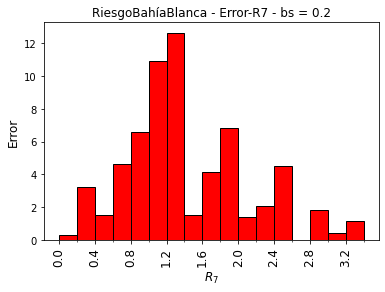

<Figure size 432x288 with 0 Axes>

In [7]:
bs = 0.2
file_name = files[1]
print(files[1])
error,r_seven = get_Error(files[1])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_BahiaBlanca.pdf')

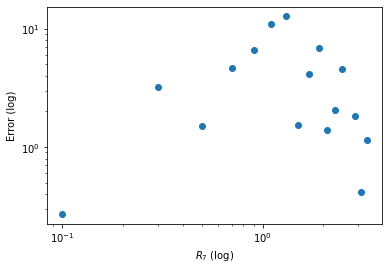

In [8]:
plt.scatter(b_centers,b_errors)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('BahiaBlanca_1.pdf')
np.savetxt('BahiaBlanca_hist.txt',(b_centers,b_errors))

# bariloche

RiesgoBariloche
RiesgoBariloche 3.1 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


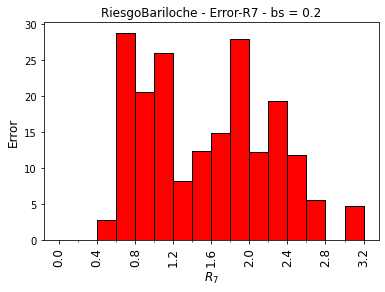

<Figure size 432x288 with 0 Axes>

In [9]:
bs = 0.2
print(files[2])
file_name = files[2]
error,r_seven = get_Error(files[2])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_Bariloche.pdf')

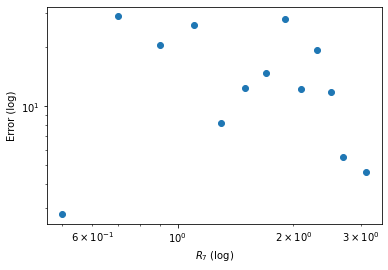

In [10]:
plt.scatter(b_centers[2:],b_errors[2:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('Bariloche_1.pdf')
np.savetxt('Bariloche_hist.txt',(b_centers[2:],b_errors[2:]))

# buenos aires

RiesgoBuenosAires
RiesgoBuenosAires 2.7 0.6


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


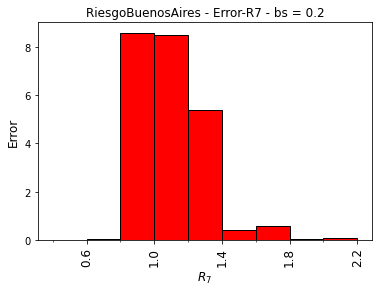

<Figure size 432x288 with 0 Axes>

In [11]:
bs = 0.2
print(files[3])
file_name = files[3]
error,r_seven = get_Error(files[3])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_BuenosAires.pdf')

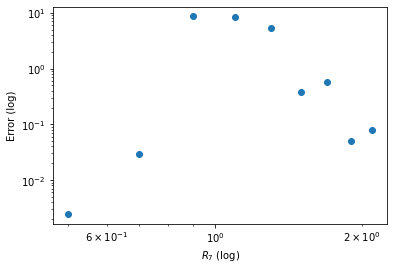

In [12]:
plt.scatter(b_centers,b_errors)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('BuenosAires_1.pdf')
np.savetxt('BuenosAires_hist.txt',(b_centers,b_errors))

# CABA TOTAL

RiesgoCABACABANA
RiesgoCABACABANA 3.6 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


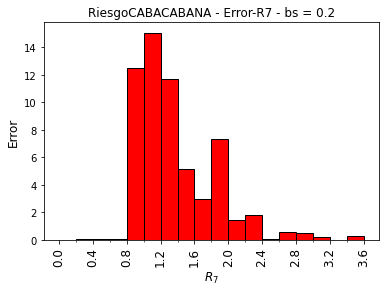

<Figure size 432x288 with 0 Axes>

In [13]:
bs = 0.2
print(files[4])
file_name = files[4]
error,r_seven = get_Error(files[4])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_CABA.pdf')

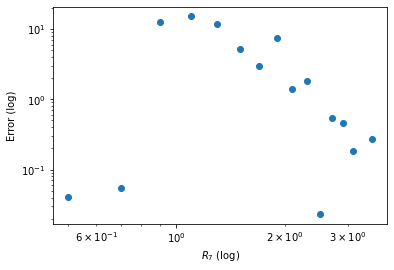

In [15]:
plt.scatter(b_centers[2:],b_errors[2:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('CABA_1.pdf')
np.savetxt('CABA_hist.txt',(b_centers[2:],b_errors[2:]))

# cordoba capital

RiesgoCórdobaCapital
RiesgoCórdobaCapital 3.3 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


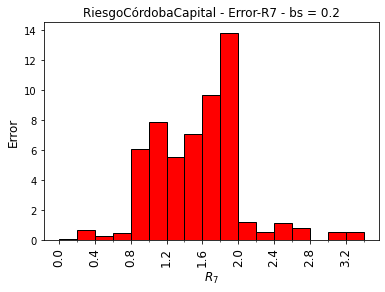

<Figure size 432x288 with 0 Axes>

In [16]:
bs = 0.2
print(files[6])
file_name = files[6]
error,r_seven = get_Error(files[6])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_CordobaCapital.pdf')

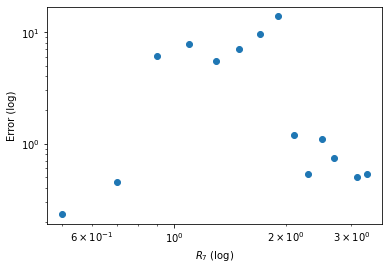

In [17]:
plt.scatter(b_centers[2:],b_errors[2:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('CordobaCapital_1.pdf')
np.savetxt('CordobaCapital_hist.txt',(b_centers[2:],b_errors[2:]))

# cordoba provincia

RiesgoCórdobaCórdoba
RiesgoCórdobaCórdoba 3.6 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


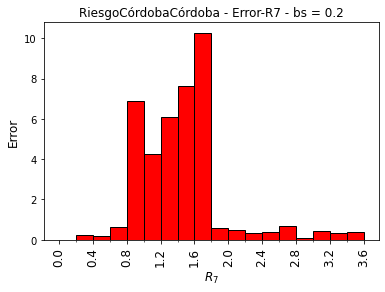

<Figure size 432x288 with 0 Axes>

In [18]:
bs = 0.2
print(files[7])
file_name = files[7]
error,r_seven = get_Error(files[7])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_CordobaProv.pdf')

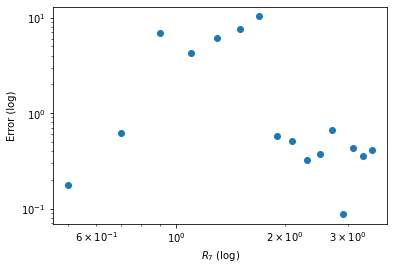

In [19]:
plt.scatter(b_centers[2:],b_errors[2:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('CordobaProv_1.pdf')
np.savetxt('CordobaProv_hist.txt',(b_centers[2:],b_errors[2:]))

# rio negro

RiesgoRioNegro
RiesgoRioNegro 3.2 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


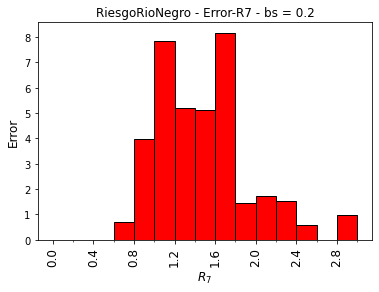

<Figure size 432x288 with 0 Axes>

In [20]:
bs = 0.2
print(files[9])
file_name = files[9]
error,r_seven = get_Error(files[9])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_RioNegroProv.pdf')

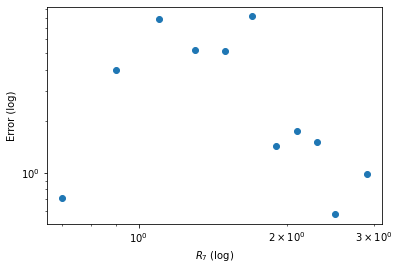

In [21]:
plt.scatter(b_centers[3:],b_errors[3:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('RioNegroProv_1.pdf')
np.savetxt('RioNegroProv_hist.txt',(b_centers[3:],b_errors[3:]))

# rosario

RiesgoSantaFeRosario
RiesgoSantaFeRosario 3.7 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


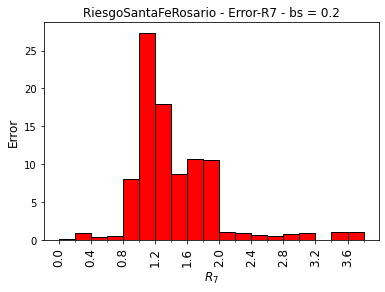

<Figure size 432x288 with 0 Axes>

In [22]:
bs = 0.2
print(files[11])
file_name = files[11]
error,r_seven = get_Error(files[11])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_Rosario.pdf')

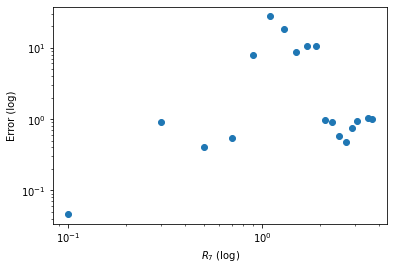

In [23]:
plt.scatter(b_centers,b_errors)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('Rosario_1.pdf')
np.savetxt('Rosario_hist.txt',(b_centers,b_errors))

# santa fe 

RiesgoSantaFeSantaFe
RiesgoSantaFeSantaFe 4.0 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


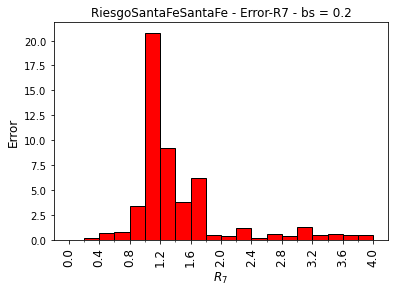

<Figure size 432x288 with 0 Axes>

In [24]:
bs = 0.2
print(files[12])
file_name = files[12]
error,r_seven = get_Error(files[12])
b_centers,b_errors = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_StaFe.pdf')

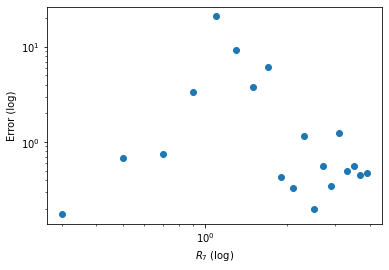

In [25]:
plt.scatter(b_centers[1:],b_errors[1:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$R_7$ (log)')
plt.ylabel(r'Error (log)')
plt.savefig('StaFe_1.pdf')
np.savetxt('StaFe_hist.txt',(b_centers[1:],b_errors[1:]))